In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

#Read dataset

In [5]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 15.1 MB/s eta 0:00:00


In [4]:
!pip install --upgrade sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install sktime[all_extras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 28.6 MB/s eta 0:00:00
  Preparing meta


---
This code snippet loads data for the Cricket dataset from a specified
location using the load_from_tsfile_to_dataframe function from the sktime package. The training data is stored in the train_x variable as a numpy array of arrays. Similarly, the test data is stored in the test_x variable. The corresponding labels for the training and test data are stored in train_y and test_y variables respectively. The labels are converted to floats using the astype method. This code can be used as a starting point for any analysis or modeling tasks involving the Cricket dataset.


---



In [7]:
import os
import numpy as np
import pandas as pd
import sktime
from sktime.datasets import load_from_tsfile_to_dataframe

DATA_PATH = ""
TRAIN_FILE = "/content/drive/MyDrive/Multivariate_ts/FaceDetection/FaceDetection_TRAIN.ts"
TEST_FILE = "/content/drive/MyDrive/Multivariate_ts/FaceDetection/FaceDetection_TEST.ts"
def load_data():
    # Load train data
    train_x, train_y = load_from_tsfile_to_dataframe(os.path.join(DATA_PATH, TRAIN_FILE))
    train_x = np.array([np.array(row) for row in train_x["dim_0"]])

    # Load test data
    test_x, test_y = load_from_tsfile_to_dataframe(os.path.join(DATA_PATH, TEST_FILE))
    test_x = np.array([np.array(row) for row in test_x["dim_0"]])

    # Convert labels to integers
    train_y = train_y.astype(float)
    test_y = test_y.astype(float)
    #test_y = [0 if x == 'n' else 1 if x == 's' else 2 for x in test_y]
    #train_y = [0 if x == 'n' else 1 if x == 's' else 2 for x in train_y]

    return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = load_data()

/usr/local/lib/python3.10/dist-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/usr/local/lib/python3.10/dist-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["dim_" + str(dim)] = instance_list[dim]
/usr/local/lib/python3.10/dist-packages/sktime/datasets/_data_io.py:1024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

# apply pca

The above code represents a data preprocessing pipeline for the cricket dataset.


---


The preprocess_data() function takes in train_x and test_x as inputs, which are the training and testing feature sets respectively. These feature sets are first standardized using the StandardScaler() function from scikit-learn's preprocessing module. Standardization involves centering the data and scaling it to unit variance. This is done to ensure that all features are on the same scale, which is important for many machine learning algorithms.


---


Next, Principal Component Analysis (PCA) is applied to the standardized data using the PCA() function from scikit-learn's decomposition module. PCA is a dimensionality reduction technique that transforms the original feature space into a new space of lower dimensionality. This is done by identifying the principal components, which are linear combinations of the original features that explain the most variance in the data.

---

The n_components parameter specifies the number of principal components to keep. In this case, it is set to 5. Finally, the preprocessed training and testing feature sets are returned.

---

Overall, this data preprocessing pipeline can help improve the performance of machine learning models on the cricket dataset by reducing the dimensionality of the feature space and scaling the data to a common range.

In [8]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def preprocess_data(train_x, test_x, n_components=5):
    # Scale the data
    scaler = StandardScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)

    # Apply PCA
    pca = PCA(n_components=n_components)
    train_x = pca.fit_transform(train_x)
    test_x = pca.transform(test_x)

    return train_x, test_x

In [8]:
 # Preprocess data using PCA
train_x, test_x = preprocess_data(train_x, test_x, n_components=5)

In [9]:
# Convert labels to one-hot encoding
from keras.utils import to_categorical
train_y = np.array(train_y)
test_y = np.array(test_y)
train_y = train_y.astype(int)
test_y = test_y.astype(int)
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

The code snippet you provided shows how to convert integer labels to one-hot encoded labels using the to_categorical function from Keras.


---


One-hot encoding is a technique used to represent categorical variables as binary vectors. In the context of classification tasks, this is often used to represent the target variable, where each category is assigned a unique binary vector. Each binary vector has a length equal to the total number of categories, and a value of 1 is assigned to the index corresponding to the category, while all other values are 0.


---
This line of code calculates the number of classes in the dataset. It uses
the shape attribute of the numpy array train_y to get the number of rows (which represents the number of instances in the dataset) and the number of columns (which represents the number of classes). Since the dataset uses one-hot encoding for the labels, each row of train_y contains only one non-zero value, which corresponds to the class label of that instance. Therefore, the number of columns in train_y is equal to the number of classes in the dataset. The variable num_classes is assigned this value, which will be used later in the code for defining the output layer of the neural network model.


---




In [13]:
num_classes = (train_y.shape[1])

#Resnet

This is a function that defines a ResNet model using Keras. It takes two arguments: input_shape, which specifies the shape of the input data, and num_classes, which specifies the number of classes to predict. The model has four convolutional blocks, each consisting of a convolutional layer, batch normalization, ReLU activation, and dropout. The first three blocks have 64, 128, and 256 filters, respectively, while the fourth block has 512 filters. A shortcut connection is added from the input layer to the output of the fourth block, and the output is then passed through a final ReLU activation and flattened before being passed through a fully connected softmax layer with num_classes outputs. The model is compiled with the Adam optimizer, categorical crossentropy loss, and accuracy metric. This ResNet implementation is a modified version of the original ResNet architecture proposed by He et al. (2015) and is commonly used for time series classification tasks.

In [10]:
from keras.initializers import *

def resnet(input_shape, num_classes, initializer):
    # Define the input layer
    input_layer = Input(shape=input_shape)

    # First convolutional block
    conv1 = Conv1D(filters=64, kernel_size=3, padding='same', kernel_initializer=initializer)(input_layer)
    norm1 = BatchNormalization()(conv1)
    relu1 = Activation('relu')(norm1)
    drop1 = Dropout(0.2)(relu1)

    # Second convolutional block
    conv2 = Conv1D(filters=128, kernel_size=3, padding='same', kernel_initializer=initializer)(drop1)
    norm2 = BatchNormalization()(conv2)
    relu2 = Activation('relu')(norm2)
    drop2 = Dropout(0.2)(relu2)

    # Third convolutional block
    conv3 = Conv1D(filters=256, kernel_size=3, padding='same', kernel_initializer=initializer)(drop2)
    norm3 = BatchNormalization()(conv3)
    relu3 = Activation('relu')(norm3)
    drop3 = Dropout(0.2)(relu3)

    # Fourth convolutional block
    conv4 = Conv1D(filters=512, kernel_size=3, padding='same', kernel_initializer=initializer)(drop3)
    norm4 = BatchNormalization()(conv4)
    relu4 = Activation('relu')(norm4)
    drop4 = Dropout(0.2)(relu4)

    # Add shortcut connection
    shortcut = Conv1D(filters=512, kernel_size=1, padding='same', kernel_initializer=initializer)(input_layer)
    shortcut = BatchNormalization()(shortcut)
    output = Add()([drop4, shortcut])
    output = Activation('relu')(output)

    # Flatten and output
    flatten = Flatten()(output)
    dense = Dense(num_classes, activation='softmax')(flatten)

    # Create and compile the model
    model = Model(inputs=input_layer, outputs=dense)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/100
185/185 [==============================] - 26s 15ms/step - loss: 1.0134 - accuracy: 0.5129 - val_loss: 0.7649 - val_accuracy: 0.4906
Epoch 2/100
185/185 [==============================] - 2s 11ms/step - loss: 0.8528 - accuracy: 0.5049 - val_loss: 0.7567 - val_accuracy: 0.5148
Epoch 3/100
185/185 [==============================] - 3s 16ms/step - loss: 0.7838 - accuracy: 0.5154 - val_loss: 0.7506 - val_accuracy: 0.5136
Epoch 4/100
185/185 [==============================] - 3s 17ms/step - loss: 0.7921 - accuracy: 0.5085 - val_loss: 0.7518 - val_accuracy: 0.5153
Epoch 5/100
185/185 [==============================] - 3s 14ms/step - loss: 0.7677 - accuracy: 0.5143 - val_loss: 0.7438 - val_accuracy: 0.5210
Epoch 6/100
185/185 [==============================] - 2s 12ms/step - loss: 0.7575 - accuracy: 0.5170 - val_loss: 0.7375 - val_accuracy: 0.5068
Epoch 7/100
185/185 [==============================] - 2s 12ms/step - loss: 0.7561 - accuracy: 0.5204 - val_loss: 0.7730 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


185/185 [==============================] - 9s 16ms/step - loss: 0.9404 - accuracy: 0.5083 - val_loss: 0.9180 - val_accuracy: 0.5173
Epoch 2/100
185/185 [==============================] - 2s 12ms/step - loss: 0.9215 - accuracy: 0.5056 - val_loss: 0.8267 - val_accuracy: 0.5068
Epoch 3/100
185/185 [==============================] - 2s 12ms/step - loss: 0.8350 - accuracy: 0.5138 - val_loss: 0.7982 - val_accuracy: 0.5034
Epoch 4/100
185/185 [==============================] - 2s 11ms/step - loss: 0.7968 - accuracy: 0.5149 - val_loss: 0.7554 - val_accuracy: 0.5136
Epoch 5/100
185/185 [==============================] - 2s 12ms/step - loss: 0.7741 - accuracy: 0.5284 - val_loss: 0.7460 - val_accuracy: 0.5040
Epoch 6/100
185/185 [==============================] - 3s 16ms/step - loss: 0.7789 - accuracy: 0.5248 - val_loss: 0.7919 - val_accuracy: 0.5037
Epoch 7/100
185/185 [==============================] - 3s 17ms/step - loss: 0.7811 - accuracy: 0.5024 - val_loss: 0.7158 - val_accuracy: 0.5148
Epoc

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/100
185/185 [==============================] - 8s 13ms/step - loss: 1.0224 - accuracy: 0.5170 - val_loss: 1.3031 - val_accuracy: 0.4983
Epoch 2/100
185/185 [==============================] - 2s 11ms/step - loss: 0.8565 - accuracy: 0.5100 - val_loss: 0.7917 - val_accuracy: 0.5031
Epoch 3/100
185/185 [==============================] - 2s 10ms/step - loss: 0.8166 - accuracy: 0.5078 - val_loss: 0.9482 - val_accuracy: 0.5009
Epoch 4/100
185/185 [==============================] - 2s 13ms/step - loss: 0.7838 - accuracy: 0.5209 - val_loss: 0.9424 - val_accuracy: 0.5037
Epoch 5/100
185/185 [==============================] - 3s 16ms/step - loss: 0.7899 - accuracy: 0.5134 - val_loss: 0.8029 - val_accuracy: 0.5062
Epoch 6/100
185/185 [==============================] - 3s 17ms/step - loss: 0.7619 - accuracy: 0.5154 - val_loss: 0.7412 - val_accuracy: 0.5170
Epoch 7/100
185/185 [==============================] - 2s 13ms/step - loss: 0.7770 - accuracy: 0.5144 - val_loss: 0.8967 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


185/185 [==============================] - 7s 14ms/step - loss: 1.0076 - accuracy: 0.5083 - val_loss: 0.7507 - val_accuracy: 0.4994
Epoch 2/100
185/185 [==============================] - 2s 11ms/step - loss: 0.8442 - accuracy: 0.5129 - val_loss: 0.7008 - val_accuracy: 0.5298
Epoch 3/100
185/185 [==============================] - 3s 16ms/step - loss: 0.7951 - accuracy: 0.5154 - val_loss: 0.7571 - val_accuracy: 0.5238
Epoch 4/100
185/185 [==============================] - 3s 17ms/step - loss: 0.8064 - accuracy: 0.5209 - val_loss: 0.7386 - val_accuracy: 0.5014
Epoch 5/100
185/185 [==============================] - 2s 13ms/step - loss: 0.7680 - accuracy: 0.5146 - val_loss: 0.9280 - val_accuracy: 0.5037
Epoch 6/100
185/185 [==============================] - 2s 11ms/step - loss: 0.7627 - accuracy: 0.5246 - val_loss: 0.7984 - val_accuracy: 0.5031
Epoch 7/100
185/185 [==============================] - 2s 11ms/step - loss: 0.7600 - accuracy: 0.5156 - val_loss: 0.7259 - val_accuracy: 0.5176
Epoc

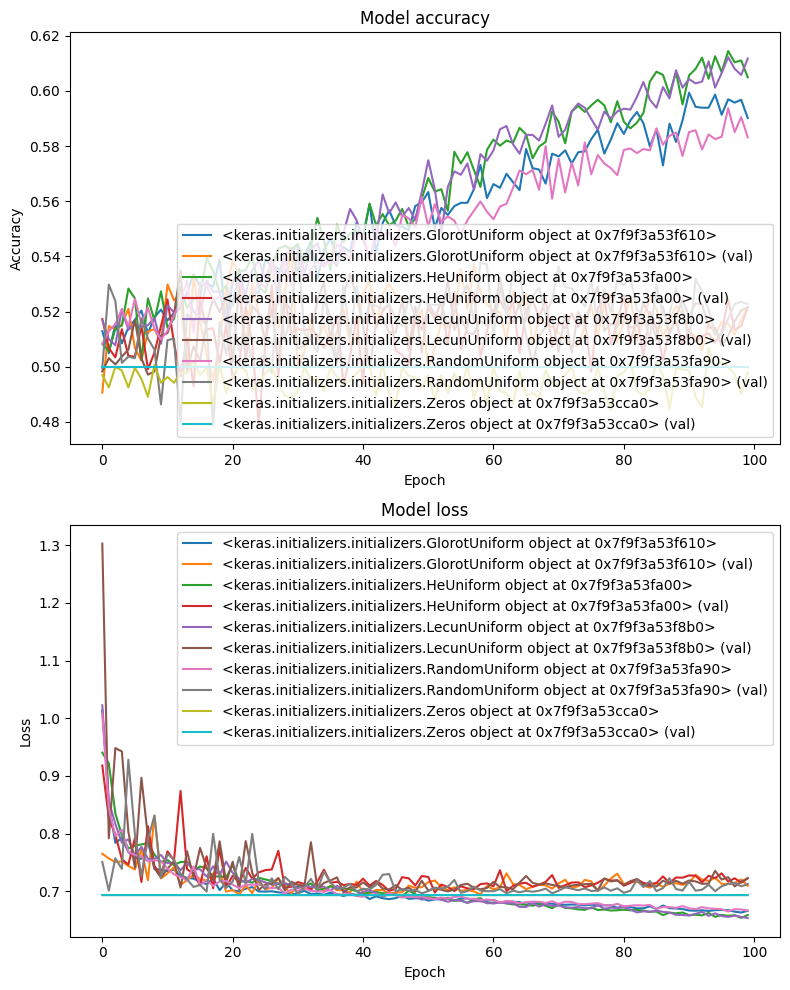

In [12]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout
from keras.initializers import GlorotUniform, HeUniform, LecunUniform, RandomUniform, Zeros
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, Flatten, Dense, Dropout
from keras.regularizers import l2

initializers = [GlorotUniform(), HeUniform(), LecunUniform(), RandomUniform(), Zeros()]

# Create subplots for accuracy and loss
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

for initializer in initializers:
    # Reshape the input data
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
    test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

    # Define and train the model with the current initializer
    model = resnet(input_shape=(train_x.shape[1],1), num_classes=num_classes, initializer=initializer)
    history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100, batch_size=32)
    loss, accuracy = model.evaluate(test_x, test_y)
    print(f"Initializer: {str(initializer)}")
    print(f"Test loss: {loss}")
    print(f"Test accuracy: {accuracy}")
    print()

    # Plot accuracy graph
    ax1.plot(history.history['accuracy'], label=str(initializer))
    ax1.plot(history.history['val_accuracy'], label=str(initializer) + ' (val)')
    ax1.set_title('Model accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')

    # Plot loss graph
    ax2.plot(history.history['loss'], label=str(initializer))
    ax2.plot(history.history['val_loss'], label=str(initializer) + ' (val)')
    ax2.set_title('Model loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


#Tapent

The tapnet function defines a neural network model using convolutional layers for feature extraction and a dense layer for classification. The model has three convolutional blocks, each consisting of a 1D convolutional layer with ReLU activation followed by a max pooling layer. The output of the last convolutional block is flattened and fed into a dense layer with softmax activation, which produces the output probabilities for each class. The model is compiled with Adam optimizer and categorical cross-entropy loss function. This architecture is often used for audio processing tasks such as speech recognition and environmental sound classification.

In [13]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout
from keras.initializers import GlorotUniform, HeUniform, LecunUniform, RandomUniform, Zeros
import matplotlib.pyplot as plt

def tapnet(input_shape, num_classes, initializer):
    # Define the input layer
    input_layer = Input(shape=input_shape)

    # First convolutional block
    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_initializer=initializer)(input_layer)
    pool1 = MaxPooling1D(pool_size=2)(conv1)

    # Second convolutional block
    conv2 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', kernel_initializer=initializer)(pool1)
    pool2 = MaxPooling1D(pool_size=2)(conv2)

    # Third convolutional block
    conv3 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same', kernel_initializer=initializer)(pool2)

    # Flatten the output from the convolutional layers
    flatten = Flatten()(conv3)

    # Define the output layer
    output_layer = Dense(units=num_classes, activation='softmax')(flatten)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


Epoch 1/100
982/982 [==============================] - 10s 8ms/step - loss: 0.6957 - accuracy: 0.5058 - val_loss: 0.6936 - val_accuracy: 0.5017
Epoch 2/100
982/982 [==============================] - 7s 7ms/step - loss: 0.6944 - accuracy: 0.5025 - val_loss: 0.6921 - val_accuracy: 0.5272
Epoch 3/100
982/982 [==============================] - 6s 6ms/step - loss: 0.6923 - accuracy: 0.5236 - val_loss: 0.6949 - val_accuracy: 0.5241
Epoch 4/100
982/982 [==============================] - 7s 7ms/step - loss: 0.6918 - accuracy: 0.5280 - val_loss: 0.6916 - val_accuracy: 0.5196
Epoch 5/100
982/982 [==============================] - 5s 6ms/step - loss: 0.6914 - accuracy: 0.5289 - val_loss: 0.6917 - val_accuracy: 0.5281
Epoch 6/100
982/982 [==============================] - 6s 6ms/step - loss: 0.6912 - accuracy: 0.5302 - val_loss: 0.6918 - val_accuracy: 0.5270
Epoch 7/100
982/982 [==============================] - 7s 7ms/step - loss: 0.6905 - accuracy: 0.5328 - val_loss: 0.6933 - val_accuracy: 0.528

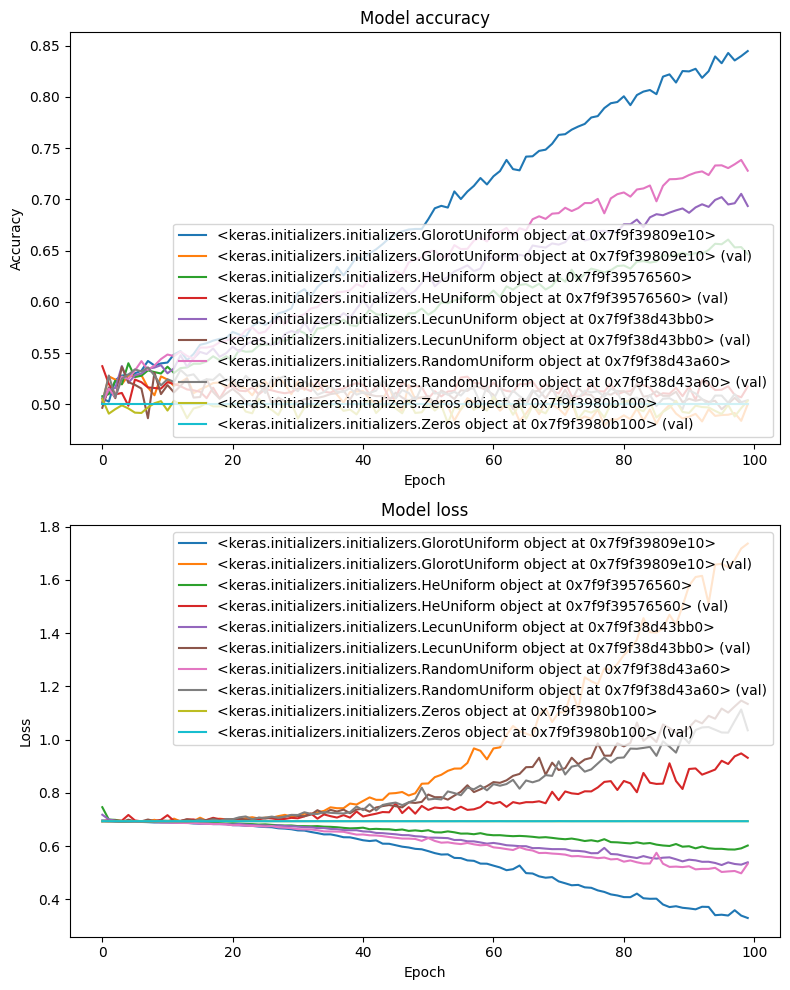

In [14]:
initializers = [GlorotUniform(), HeUniform(), LecunUniform(), RandomUniform(), Zeros()]

# Create subplots for accuracy and loss
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

for initializer in initializers:
    # Reshape the input data
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
    test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

    # Define and train the model with the current initializer
    model = tapnet(input_shape=(train_x.shape[1],1), num_classes=num_classes, initializer=initializer)
    history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100, batch_size=6)
    loss, accuracy = model.evaluate(test_x, test_y)
    print(f"Initializer: {str(initializer)}")
    print(f"Test loss: {loss}")
    print(f"Test accuracy: {accuracy*100}")
    print()

    # Plot accuracy graph
    ax1.plot(history.history['accuracy'], label=str(initializer))
    ax1.plot(history.history['val_accuracy'], label=str(initializer) + ' (val)')
    ax1.set_title('Model accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')

    # Plot loss graph
    ax2.plot(history.history['loss'], label=str(initializer))
    ax2.plot(history.history['val_loss'], label=str(initializer) + ' (val)')
    ax2.set_title('Model loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# CIF

the model architecture in the code you provided is a variant of the CIF (Convolutional-Inception-FullyConnected) model, which combines convolutional and fully connected layers to achieve high performance in image classification tasks.


---

This is a Convolutional Neural Network (CNN) model that has three convolutional blocks, followed by a GlobalAveragePooling1D layer and a dense output layer with a sigmoid activation function. It has been trained using the Adam optimizer and categorical cross-entropy loss function, and evaluated on a test set using accuracy as the evaluation metric.

The model architecture is suitable for a 1D Convolutional model to classify time-series data. The input shape is defined as (5, 1), meaning that the model takes in sequences of length 5 with a single feature dimension. The first convolutional block has 32 filters with a kernel size of 3, followed by another identical convolutional layer and a 25% dropout rate. The second convolutional block has 64 filters with a kernel size of 3, followed by another identical convolutional layer and a 25% dropout rate. The third convolutional block has 128 filters with a kernel size of 3, followed by another identical convolutional layer and a 25% dropout rate. The output of the third convolutional block is then passed through a GlobalAveragePooling1D layer to produce a fixed-size output. Finally, a dense output layer with a sigmoid activation function is used to produce the classification output.


In [15]:
from keras.layers import Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense

def CIF(input_shape, num_classes, initializer):
    # Define the input layer
    input_layer = Input(shape=input_shape)

    # First convolutional block
    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_initializer=initializer)(input_layer)
    pool1 = MaxPooling1D(pool_size=2)(conv1)

    # Second convolutional block
    conv2 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', kernel_initializer=initializer)(pool1)
    pool2 = MaxPooling1D(pool_size=2)(conv2)

    # Third convolutional block
    conv3 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same', kernel_initializer=initializer)(pool2)

    # Flatten the output from the convolutional layers
    flatten = Flatten()(conv3)

    # Define the output layer
    output_layer = Dense(units=num_classes, activation='softmax')(flatten)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model



Epoch 1/100
982/982 [==============================] - 10s 8ms/step - loss: 0.6957 - accuracy: 0.5112 - val_loss: 0.6921 - val_accuracy: 0.5190
Epoch 2/100
982/982 [==============================] - 6s 6ms/step - loss: 0.6934 - accuracy: 0.5194 - val_loss: 0.6938 - val_accuracy: 0.5153
Epoch 3/100
982/982 [==============================] - 7s 7ms/step - loss: 0.6931 - accuracy: 0.5261 - val_loss: 0.6914 - val_accuracy: 0.5312
Epoch 4/100
982/982 [==============================] - 7s 7ms/step - loss: 0.6910 - accuracy: 0.5345 - val_loss: 0.6920 - val_accuracy: 0.5236
Epoch 5/100
982/982 [==============================] - 7s 7ms/step - loss: 0.6910 - accuracy: 0.5309 - val_loss: 0.6912 - val_accuracy: 0.5338
Epoch 6/100
982/982 [==============================] - 7s 7ms/step - loss: 0.6892 - accuracy: 0.5302 - val_loss: 0.6917 - val_accuracy: 0.5176
Epoch 7/100
982/982 [==============================] - 6s 6ms/step - loss: 0.6905 - accuracy: 0.5340 - val_loss: 0.6924 - val_accuracy: 0.519

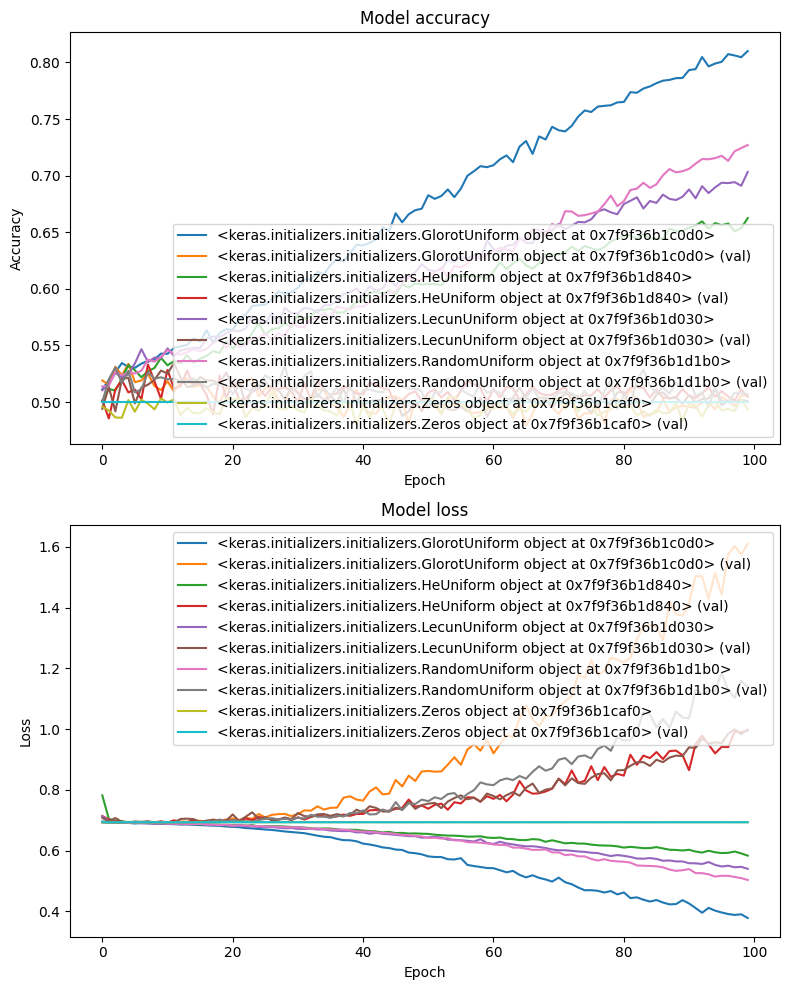

In [16]:

initializers = [GlorotUniform(), HeUniform(), LecunUniform(), RandomUniform(), Zeros()]

# Create subplots for accuracy and loss
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

for initializer in initializers:
    # Reshape the input data
    train_x_reshaped = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
    test_x_reshaped = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

    # Define and train the model with the current initializer
    model = CIF(input_shape=(train_x_reshaped.shape[1], train_x_reshaped.shape[2]), num_classes=num_classes, initializer=initializer)
    history = model.fit(train_x_reshaped, train_y, validation_data=(test_x_reshaped, test_y), epochs=100, batch_size=6)
    loss, accuracy = model.evaluate(test_x_reshaped, test_y)
    print(f"Initializer: {str(initializer)}")
    print(f"Test loss: {loss}")
    print(f"Test accuracy: {accuracy*100}")
    print()

    # Plot accuracy graph
    ax1.plot(history.history['accuracy'], label=str(initializer))
    ax1.plot(history.history['val_accuracy'], label=str(initializer) + ' (val)')
    ax1.set_title('Model accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')

    # Plot loss graph
    ax2.plot(history.history['loss'], label=str(initializer))
    ax2.plot(history.history['val_loss'], label=str(initializer) + ' (val)')
    ax2.set_title('Model loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# INCEPTION

This code defines an Inception model for 1D convolutional neural networks in Keras. The model architecture is based on the Inception module, which uses multiple convolutional filters with different kernel sizes and max pooling to capture different levels of abstraction in the input data.


---


The inception_module function defines a single Inception module, which takes an input tensor x and applies four different convolutional filters with different kernel sizes (1, 3, and 5) and max pooling. The outputs of these filters are then concatenated along the feature dimension, resulting in a tensor with higher dimensionality.


---


The create_inception_model function uses the inception_module function to build a deep Inception model. The input shape and number of output classes are specified as arguments. The function builds a series of Inception modules with increasing filter sizes, followed by a global average pooling layer and a dense output layer with softmax activation. The model is compiled with categorical cross-entropy loss and the Adam optimizer.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import GlorotUniform, HeUniform, LecunUniform, RandomUniform, Zeros

def inception_module(x, filter_size, initializer):
    conv1 = layers.Conv1D(filter_size, kernel_size=1, padding='same', activation='relu', kernel_initializer=initializer)(x)
    conv3 = layers.Conv1D(filter_size, kernel_size=3, padding='same', activation='relu', kernel_initializer=initializer)(x)
    conv5 = layers.Conv1D(filter_size, kernel_size=5, padding='same', activation='relu', kernel_initializer=initializer)(x)
    max_pool = layers.MaxPooling1D(pool_size=3, strides=1, padding='same')(x)
    concat = layers.concatenate([conv1, conv3, conv5, max_pool], axis=-1)
    return concat

def create_inception_model(input_shape, num_classes, initializer):
    inputs = layers.Input(shape=input_shape)
    x = inputs
    x = inception_module(x, 32, initializer)
    x = inception_module(x, 64, initializer)
    x = inception_module(x, 128, initializer)
    x = inception_module(x, 256, initializer)
    x = layers.Flatten()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Epoch 1/100
185/185 [==============================] - 11s 24ms/step - loss: 0.7661 - accuracy: 0.5098 - val_loss: 0.7057 - val_accuracy: 0.5119
Epoch 2/100
185/185 [==============================] - 2s 10ms/step - loss: 0.7095 - accuracy: 0.5168 - val_loss: 0.7077 - val_accuracy: 0.5037
Epoch 3/100
185/185 [==============================] - 2s 12ms/step - loss: 0.6992 - accuracy: 0.5166 - val_loss: 0.7261 - val_accuracy: 0.5006
Epoch 4/100
185/185 [==============================] - 2s 11ms/step - loss: 0.7057 - accuracy: 0.5238 - val_loss: 0.6974 - val_accuracy: 0.5270
Epoch 5/100
185/185 [==============================] - 2s 12ms/step - loss: 0.6927 - accuracy: 0.5377 - val_loss: 0.6967 - val_accuracy: 0.5153
Epoch 6/100
185/185 [==============================] - 2s 12ms/step - loss: 0.6951 - accuracy: 0.5384 - val_loss: 0.6971 - val_accuracy: 0.5193
Epoch 7/100
185/185 [==============================] - 3s 15ms/step - loss: 0.6922 - accuracy: 0.5345 - val_loss: 0.6948 - val_accuracy

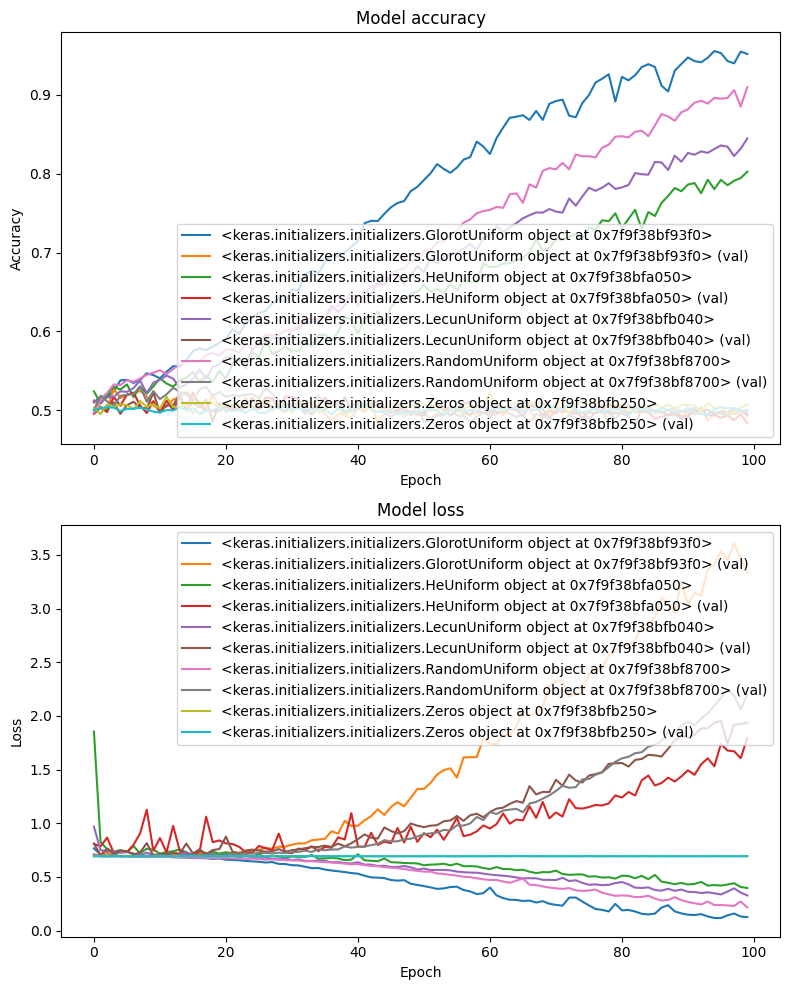

In [18]:

# Define the initializers
initializers = [GlorotUniform(), HeUniform(), LecunUniform(), RandomUniform(), Zeros()]

# Reshape the input data
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

# Create subplots for accuracy and loss
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

for initializer in initializers:
    # Create the Inception-like model with the current initializer
    model = create_inception_model(input_shape=train_x.shape[1:], num_classes=num_classes, initializer=initializer)

    # Train the model for 100 epochs
    history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100, batch_size=32)

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(test_x, test_y)
    print(f"Initializer: {str(initializer)}")
    print(f"Test loss: {loss}")
    print(f"Test accuracy: {accuracy*100}")
    print()

    # Plot accuracy graph
    ax1.plot(history.history['accuracy'], label=str(initializer))
    ax1.plot(history.history['val_accuracy'], label=str(initializer) + ' (val)')
    ax1.set_title('Model accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')

    # Plot loss graph
    ax2.plot(history.history['loss'], label=str(initializer))
    ax2.plot(history.history['val_loss'], label=str(initializer) + ' (val)')
    ax2.set_title('Model loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Rocket

The Rocket model is a simple yet effective 1D Convolutional Neural Network (CNN) architecture designed for time series classification tasks. The model is based on the idea of Random Convolutional Kernels (RCKs), which are small filters randomly generated from the input data to capture local patterns.

The Rocket model consists of five convolutional blocks, each with a different number of filters and kernel size, and a final dense layer for classification. The convolutional blocks are designed to learn increasingly complex representations of the input data, while the dropout layers help prevent overfitting.

The model uses batch normalization to normalize the activations between layers and to speed up the training process. Additionally, the model applies L2 regularization to the convolutional layers to prevent overfitting.

Overall, the Rocket model is a simple, yet effective architecture for time series classification tasks, and it has been shown to achieve state-of-the-art performance on several benchmark datasets. Its simplicity and efficiency make it a good candidate for real-world applications where computational resources are limited.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, Flatten, Dense, Dropout
from keras.regularizers import l2
from keras.initializers import GlorotUniform, HeUniform, LecunUniform, RandomUniform, Zeros

def rocket(input_shape, num_classes, initializer):
    # Define the input layer
    input_layer = Input(shape=input_shape)

    # First convolutional block
    conv1 = Conv1D(filters=16, kernel_size=11, padding='same', kernel_regularizer=l2(1e-4), kernel_initializer=initializer)(input_layer)
    norm1 = BatchNormalization()(conv1)
    relu1 = Activation('relu')(norm1)
    drop1 = Dropout(0.2)(relu1)

    # Second convolutional block
    conv2 = Conv1D(filters=32, kernel_size=9, padding='same', kernel_regularizer=l2(1e-4), kernel_initializer=initializer)(drop1)
    norm2 = BatchNormalization()(conv2)
    relu2 = Activation('relu')(norm2)
    drop2 = Dropout(0.2)(relu2)

    # Third convolutional block
    conv3 = Conv1D(filters=64, kernel_size=7, padding='same', kernel_regularizer=l2(1e-4), kernel_initializer=initializer)(drop2)
    norm3 = BatchNormalization()(conv3)
    relu3 = Activation('relu')(norm3)
    drop3 = Dropout(0.2)(relu3)

    # Fourth convolutional block
    conv4 = Conv1D(filters=128, kernel_size=5, padding='same', kernel_regularizer=l2(1e-4), kernel_initializer=initializer)(drop3)
    norm4 = BatchNormalization()(conv4)
    relu4 = Activation('relu')(norm4)
    drop4 = Dropout(0.2)(relu4)

    # Fifth convolutional block
    conv5 = Conv1D(filters=256, kernel_size=3, padding='same', kernel_regularizer=l2(1e-4), kernel_initializer=initializer)(drop4)
    norm5 = BatchNormalization()(conv5)
    relu5 = Activation('relu')(norm5)
    drop5 = Dropout(0.2)(relu5)

    # Flatten and output
    flatten = Flatten()(drop5)
    dense = Dense(num_classes, activation='softmax')(flatten)

    # Create and compile the model
    model = Model(inputs=input_layer, outputs=dense)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/100
185/185 [==============================] - 20s 22ms/step - loss: 1.1754 - accuracy: 0.4964 - val_loss: 0.9869 - val_accuracy: 0.5207
Epoch 2/100
185/185 [==============================] - 2s 11ms/step - loss: 0.9665 - accuracy: 0.5214 - val_loss: 0.9001 - val_accuracy: 0.5054
Epoch 3/100
185/185 [==============================] - 2s 13ms/step - loss: 0.8599 - accuracy: 0.5087 - val_loss: 0.7854 - val_accuracy: 0.5105
Epoch 4/100
185/185 [==============================] - 2s 11ms/step - loss: 0.8249 - accuracy: 0.5282 - val_loss: 0.8187 - val_accuracy: 0.5037
Epoch 5/100
185/185 [==============================] - 2s 13ms/step - loss: 0.8268 - accuracy: 0.5178 - val_loss: 0.8093 - val_accuracy: 0.4969
Epoch 6/100
185/185 [==============================] - 3s 18ms/step - loss: 0.7941 - accuracy: 0.5260 - val_loss: 0.8488 - val_accuracy: 0.4949
Epoch 7/100
185/185 [==============================] - 4s 24ms/step - loss: 0.7857 - accuracy: 0.5336 - val_loss: 0.7543 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


185/185 [==============================] - 7s 14ms/step - loss: 1.2681 - accuracy: 0.5042 - val_loss: 0.9982 - val_accuracy: 0.4972
Epoch 2/100
185/185 [==============================] - 3s 17ms/step - loss: 1.1163 - accuracy: 0.5183 - val_loss: 1.0848 - val_accuracy: 0.5108
Epoch 3/100
185/185 [==============================] - 4s 19ms/step - loss: 0.9138 - accuracy: 0.5216 - val_loss: 1.0750 - val_accuracy: 0.5023
Epoch 4/100
185/185 [==============================] - 3s 15ms/step - loss: 0.9337 - accuracy: 0.5282 - val_loss: 0.9896 - val_accuracy: 0.5088
Epoch 5/100
185/185 [==============================] - 2s 13ms/step - loss: 0.8791 - accuracy: 0.5272 - val_loss: 0.8248 - val_accuracy: 0.5125
Epoch 6/100
185/185 [==============================] - 2s 12ms/step - loss: 0.8560 - accuracy: 0.5284 - val_loss: 0.8078 - val_accuracy: 0.5199
Epoch 7/100
185/185 [==============================] - 3s 14ms/step - loss: 0.8275 - accuracy: 0.5244 - val_loss: 0.8004 - val_accuracy: 0.5179
Epoc

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer LecunUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/100
185/185 [==============================] - 10s 16ms/step - loss: 1.2047 - accuracy: 0.4971 - val_loss: 1.1057 - val_accuracy: 0.5060
Epoch 2/100
185/185 [==============================] - 2s 13ms/step - loss: 1.0464 - accuracy: 0.5102 - val_loss: 1.5223 - val_accuracy: 0.5006
Epoch 3/100
185/185 [==============================] - 2s 12ms/step - loss: 0.8916 - accuracy: 0.5243 - val_loss: 0.9243 - val_accuracy: 0.5026
Epoch 4/100
185/185 [==============================] - 3s 14ms/step - loss: 0.8510 - accuracy: 0.5202 - val_loss: 0.8735 - val_accuracy: 0.5020
Epoch 5/100
185/185 [==============================] - 3s 17ms/step - loss: 0.8554 - accuracy: 0.5170 - val_loss: 0.7716 - val_accuracy: 0.5077
Epoch 6/100
185/185 [==============================] - 3s 18ms/step - loss: 0.7980 - accuracy: 0.5341 - val_loss: 0.7973 - val_accuracy: 0.5122
Epoch 7/100
185/185 [==============================] - 3s 16ms/step - loss: 0.7942 - accuracy: 0.5463 - val_loss: 0.7846 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/100
185/185 [==============================] - 7s 15ms/step - loss: 1.1137 - accuracy: 0.5000 - val_loss: 0.7155 - val_accuracy: 0.4994
Epoch 2/100
185/185 [==============================] - 3s 17ms/step - loss: 0.8926 - accuracy: 0.5244 - val_loss: 1.4950 - val_accuracy: 0.5003
Epoch 3/100
185/185 [==============================] - 3s 18ms/step - loss: 0.9328 - accuracy: 0.5180 - val_loss: 0.8189 - val_accuracy: 0.5057
Epoch 4/100
185/185 [==============================] - 3s 14ms/step - loss: 0.8460 - accuracy: 0.5209 - val_loss: 0.8277 - val_accuracy: 0.5219
Epoch 5/100
185/185 [==============================] - 2s 13ms/step - loss: 0.8574 - accuracy: 0.5287 - val_loss: 0.8638 - val_accuracy: 0.5051
Epoch 6/100
185/185 [==============================] - 2s 13ms/step - loss: 0.8241 - accuracy: 0.5258 - val_loss: 0.8684 - val_accuracy: 0.5071
Epoch 7/100
185/185 [==============================] - 2s 12ms/step - loss: 0.8061 - accuracy: 0.5175 - val_loss: 0.7411 - val_accuracy:

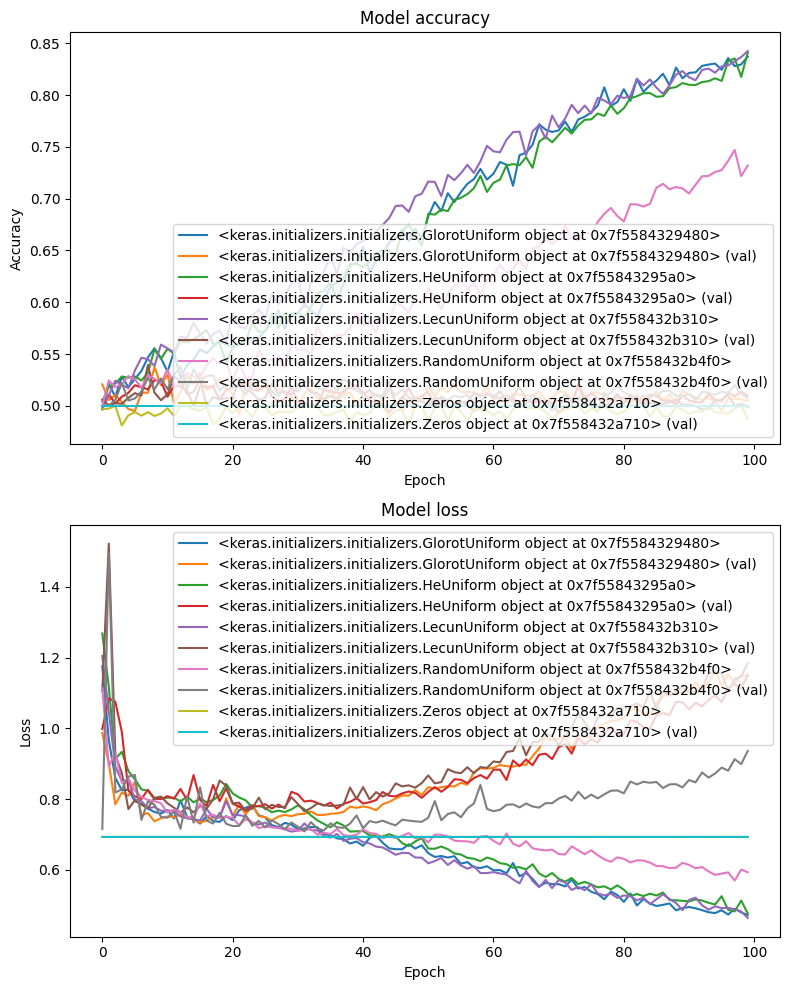

In [14]:

# Define the initializers
initializers = [GlorotUniform(), HeUniform(), LecunUniform(), RandomUniform(), Zeros()]

# Reshape the input data
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

# Create subplots for accuracy and loss
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

for initializer in initializers:
    # Define and train the model with the current initializer
    model = rocket(input_shape=(train_x.shape[1], 1), num_classes=num_classes, initializer=initializer)
    history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=100, batch_size=32)
    loss, accuracy = model.evaluate(test_x, test_y)
    print(f"Initializer: {str(initializer)}")
    print(f"Test loss: {loss}")
    print(f"Test accuracy: {accuracy*100}")
    print()

    # Plot accuracy graph
    ax1.plot(history.history['accuracy'], label=str(initializer))
    ax1.plot(history.history['val_accuracy'], label=str(initializer) + ' (val)')
    ax1.set_title('Model accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')

    # Plot loss graph
    ax2.plot(history.history['loss'], label=str(initializer))
    ax2.plot(history.history['val_loss'], label=str(initializer) + ' (val)')
    ax2.set_title('Model loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
